# GMM

In [321]:
import pandas as pd
import os
import osmnx as ox

df = pd.read_csv('online_requests.csv')
data = df[['Request Creation Date', 'Request Creation Time', 'Number of Passengers',
       'Requested Pickup Time', 'Origin Lat', 'Origin Lng','Destination Lat', 'Destination Lng']]
G = ox.load_graphml('graph_structure.graphml')
origin_nodes = ox.nearest_nodes(G, data["Origin Lng"], data["Origin Lat"])
destination_nodes = ox.nearest_nodes(G, data["Destination Lng"], data["Destination Lat"])
data["Origin Node"] = origin_nodes
data["Destination Node"] = destination_nodes
data

,Request Creation Date,Request Creation Time,Number of Passengers,Requested Pickup Time,Origin Lat,Origin Lng,Destination Lat,Destination Lng,Origin Node,Destination Node
0,2023-01-03,2023-01-03 19:12:16,1,2023-01-03 19:14:15,42.371232,-71.121891,42.362511,-71.113059,61325617,61317400
1,2023-01-03,2023-01-03 19:13:37,1,2023-01-03 19:15:36,42.377445,-71.116613,42.370020,-71.110136,61329142,61326730
2,2023-01-03,2023-01-03 19:18:56,1,2023-01-03 19:20:55,42.371281,-71.122334,42.385452,-71.115491,61325617,61170738
3,2023-01-03,2023-01-03 19:24:59,1,2023-01-03 19:26:57,42.375568,-71.128022,42.381676,-71.114599,61324786,2562486744
4,2023-01-03,2023-01-03 19:50:56,1,2023-01-03 19:52:55,42.366306,-71.115005,42.371367,-71.116546,61328439,61325523
...,...,...,...,...,...,...,...,...,...,...
33786,2022-12-22,2022-12-22 22:32:00,1,2022-12-22 22:34:00,42.376273,-71.115999,42.368864,-71.115214,61329142,61321522
33787,2022-12-22,2022-12-22 22:39:00,1,2022-12-22 22:41:00,42.379677,-71.125679,42.386852,-71.130425,61329446,61330709
33788,2022-12-22,2022-12-22 22:53:00,1,2022-12-22 22:55:00,42.379052,-71.123896,42.383926,-71.112578,61324107,71951245
33789,2022-12-22,2022-12-22 23:09:00,1,2022-12-22 23:11:00,42.375487,-71.113144,42.376736,-71.104893,61324740,61171170


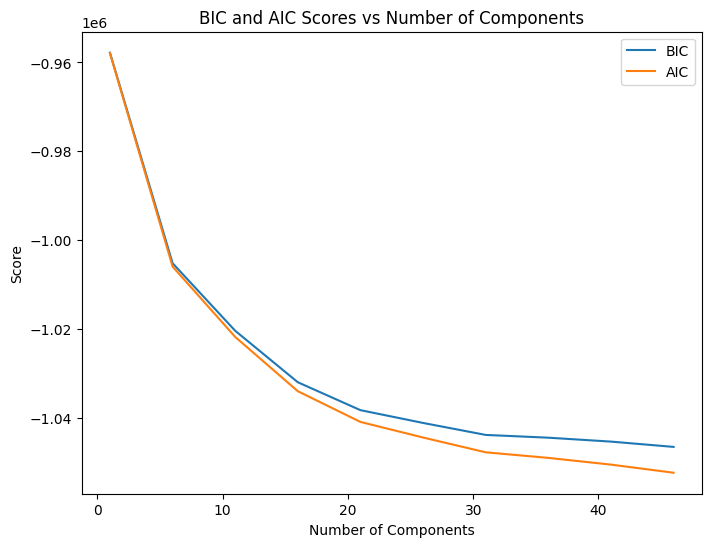

46


In [322]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# Extract the Origin Lat and Origin Lng columns from the DataFrame
X = df[['Origin Lat', 'Origin Lng', 'Destination Lat', 'Destination Lng']].values

# Define the range of n_components to try
n_components_range = range(1, 50, 5)

# Initialize lists to store the BIC and AIC scores
bic_scores = []
aic_scores = []

# Loop over different values of n_components
for n_components in n_components_range:
    # Fit a Gaussian Mixture Model
    gmm = GaussianMixture(n_components=n_components)
    gmm.fit(X)

    # Store the BIC and AIC scores
    bic_scores.append(gmm.bic(X))
    aic_scores.append(gmm.aic(X))

# Plot the BIC and AIC scores
plt.figure(figsize=(8, 6))
plt.plot(n_components_range, bic_scores, label='BIC')
plt.plot(n_components_range, aic_scores, label='AIC')
plt.xlabel('Number of Components')
plt.ylabel('Score')
plt.legend()
plt.title('BIC and AIC Scores vs Number of Components')
plt.show()
print(n_components_range[np.argmin(bic_scores)])

In [323]:
# import matplotlib as mpl
# import matplotlib.pyplot as plt
# import numpy as np
# import osmnx as ox
# from scipy import linalg
# from sklearn import mixture
# import matplotlib.cm as cm
# import itertools
# #filter this data to only some one specific data/date
# # Create a colormap
# cmap = cm.viridis  # 'viridis' is just an example, you can use any colormap you like

# # Create a list of colors from the colormap
# colors = [cmap(i) for i in np.linspace(0, 1, 28)]  # Replace 28 with the number of unique colors you need

# def plot_results(X, Y_, means, covariances, index, title, G):
#     fig, ax = ox.plot_graph(G, node_color='#111111', bgcolor='w', edge_color='#111111', edge_linewidth=0.5, node_size=3, show=False, close=False)

#     for i, (mean, covar, color) in enumerate(zip(means, covariances, colors)):
#         v, w = linalg.eigh(covar)
#         v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
#         u = w[0] / linalg.norm(w[0])

#         if not np.any(Y_ == i):
#             continue

#         ax.scatter(X[Y_ == i, 1], X[Y_ == i, 0], s=1, color=color)

#         angle = np.arctan(u[1] / u[0])
#         angle = 180.0 * angle / np.pi  # convert to degrees
#         ell = mpl.patches.Ellipse(mean[::-1], v[0], v[1], angle=180.0 + angle, color=color)
#         ell.set_clip_box(ax.bbox)
#         ell.set_alpha(0.5)
#         ax.add_patch(ell)

#     ax.set_title(title)
#     plt.show()

# X = df[['Origin Lat', 'Origin Lng']].values
# best_n_components = n_components_range[np.argmin(bic_scores)]

# gmm = mixture.GaussianMixture(n_components=best_n_components, covariance_type="full").fit(X)
# plot_results(X, gmm.predict(X), gmm.means_, gmm.covariances_, 0, "Gaussian Mixture", G)

In [324]:
# import numpy as np
# import osmnx as ox
# import matplotlib.pyplot as plt
# from sklearn import mixture

# # Assuming you have already fitted the GMM and obtained the best number of components
# gmm = mixture.GaussianMixture(n_components=best_n_components, covariance_type="full").fit(X)

# # Generate new samples from the GMM
# num_samples = 5000
# X_gmm_generated = gmm.sample(num_samples)[0]

# # Plot the generated samples and ground truth points on the map
# fig, ax = ox.plot_graph(G, node_color='#111111', bgcolor='w', edge_color='#111111',
#                         edge_linewidth=0.5, node_size=3, show=False, close=False)

# # Plot ground truth points
# indices = np.random.randint(0, len(X), size=num_samples)
# samples = X[indices]
# ax.scatter(samples[:, 1], samples[:, 0], s=1, c='blue', alpha=0.5, label='Ground Truth')

# # Plot generated samples from the GMM
# ax.scatter(X_gmm_generated[:, 1], X_gmm_generated[:, 0], s=1, c='red', alpha=0.5, label='GMM Generated')

# ax.legend()
# plt.show()

# CVAE

In [325]:
import pandas as pd
import datetime
from sklearn.model_selection import train_test_split

# Read and preprocess the data
df = pd.read_csv('online_requests.csv')
df = df[['Requested Pickup Time', 'Origin Lat', 'Origin Lng', 'Destination Lat', 'Destination Lng']]
df['Requested Pickup Time'] = pd.to_datetime(df['Requested Pickup Time'])
df['Time'] = df['Requested Pickup Time'].dt.time
df['5 min interval'] = df['Time'].apply(lambda x: (datetime.datetime.combine(datetime.date.today(), x).replace(second=0, microsecond=0, minute=5*(x.minute//5))))
df = df[(df['Time'] >= datetime.time(19, 0)) | (df['Time'] < datetime.time(2, 0))]
df['Interval'] = df['5 min interval'].dt.strftime('%H:%M')
start_time = datetime.datetime.strptime('19:00', '%H:%M')
df['Interval'] = df['Interval'].apply(lambda x: (datetime.datetime.strptime(x, '%H:%M') - start_time).seconds // 60)
df['Work Day'] = df['Requested Pickup Time'].dt.dayofweek.apply(lambda x: 1 if x < 5 else 0)
df['Day of the Week'] = df['Requested Pickup Time'].dt.dayofweek.apply(lambda x: x + 1)
df = df.reset_index(drop=True)
df.drop(columns=['Time', '5 min interval','Requested Pickup Time'], inplace=True)
df = df.sort_values(by='Interval')
df = df.reset_index(drop=True)
df

,Origin Lat,Origin Lng,Destination Lat,Destination Lng,Interval,Work Day,Day of the Week
0,42.382252,-71.124968,42.372819,-71.116707,0,1,5
1,42.372819,-71.116707,42.381018,-71.124981,0,1,1
2,42.365541,-71.103972,42.378300,-71.117081,0,1,5
3,42.372591,-71.119757,42.381808,-71.125538,0,1,5
4,42.365538,-71.103958,42.378570,-71.117578,0,1,5
...,...,...,...,...,...,...,...
32602,42.373383,-71.119986,42.381808,-71.125538,415,0,6
32603,42.381732,-71.125340,42.368868,-71.115963,415,0,6
32604,42.375683,-71.114214,42.382334,-71.111538,415,1,2
32605,42.382806,-71.119122,42.370047,-71.117401,415,1,4


In [326]:
# Split the data into train, test, and validation sets
train_df, temp_df = train_test_split(df, test_size=0.3, random_state=42)
test_df, val_df = train_test_split(temp_df, test_size=0.5, random_state=42)

# Print the sizes of the splits
print(f'Train set size: {len(train_df)}') #0.7
print(f'Test set size: {len(test_df)}') #0.15
print(f'Validation set size: {len(val_df)}') #0.15

Train set size: 22824
Test set size: 4891
Validation set size: 4892


In [327]:
!pip install torchsummary

## one part CVAE

In [592]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
from torchsummary import summary

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print('using device:', device)  

class CVAE(nn.Module):
    def __init__(self, input_dim, condition_dim, latent_dim, hidden_dim, dropout_prob=0.1):
        super(CVAE, self).__init__()
        
        self.input_dim = input_dim
        self.condition_dim = condition_dim
        self.latent_dim = latent_dim
        self.hidden_dim = hidden_dim
        
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim + condition_dim, hidden_dim), #TODO rewrite this to the CONVOLUTIONAL LAYERS!
            nn.ReLU(),
            nn.Dropout(dropout_prob),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(dropout_prob),   # Add dropout layer
        )
        self.fc_mu = nn.Linear(hidden_dim, latent_dim)
        self.fc_logvar = nn.Linear(hidden_dim, latent_dim)
        
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim + condition_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(dropout_prob),   # Add dropout layer
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(dropout_prob),   # Add dropout layer
            nn.Linear(hidden_dim, input_dim),
        )
        
    def encode(self, x, c):
        x = torch.cat([x, c], dim=1)
        h = self.encoder(x)
        return self.fc_mu(h), self.fc_logvar(h)
    
    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std
    
    def decode(self, z, c):
        z = torch.cat([z, c], dim=1)
        return self.decoder(z)
    
    def forward(self, x, c):
        mu, logvar = self.encode(x, c)
        z = self.reparameterize(mu, logvar)
        return self.decode(z, c), mu, logvar
    

# Define the model
input_dim = 4  # Example input dimension for MNIST
condition_dim = 3   # Example condition dimension
latent_dim = 4      # Example latent dimension
hidden_dim = 64     # Example hidden dimension

joint_model = CVAE(input_dim, condition_dim, latent_dim, hidden_dim).to(device)

# Print the model summary
summary(joint_model, [(input_dim,), (condition_dim,)])

using device: cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 64]             512
              ReLU-2                   [-1, 64]               0
           Dropout-3                   [-1, 64]               0
            Linear-4                   [-1, 64]           4,160
              ReLU-5                   [-1, 64]               0
           Dropout-6                   [-1, 64]               0
            Linear-7                    [-1, 4]             260
            Linear-8                    [-1, 4]             260
            Linear-9                   [-1, 64]             512
             ReLU-10                   [-1, 64]               0
          Dropout-11                   [-1, 64]               0
           Linear-12                   [-1, 64]           4,160
             ReLU-13                   [-1, 64]               0
          Dropout-14

Epoch 1, Recon Loss: 3.5688, KL Loss: 0.3108
Epoch 2, Recon Loss: 2.6897, KL Loss: 0.9151
Epoch 3, Recon Loss: 2.4861, KL Loss: 1.0303
Epoch 4, Recon Loss: 2.3578, KL Loss: 1.1437
Epoch 5, Recon Loss: 2.2734, KL Loss: 1.1757
Epoch 6, Recon Loss: 2.2385, KL Loss: 1.2145
Epoch 7, Recon Loss: 2.2031, KL Loss: 1.2210
Epoch 8, Recon Loss: 2.1803, KL Loss: 1.2292
Epoch 9, Recon Loss: 2.1705, KL Loss: 1.2366
Epoch 10, Recon Loss: 2.1432, KL Loss: 1.2513
Epoch 11, Recon Loss: 2.1229, KL Loss: 1.2663
Epoch 12, Recon Loss: 2.1149, KL Loss: 1.2684
Epoch 13, Recon Loss: 2.0792, KL Loss: 1.2884
Epoch 14, Recon Loss: 2.0888, KL Loss: 1.2973
Epoch 15, Recon Loss: 2.0721, KL Loss: 1.2937
Epoch 16, Recon Loss: 2.0725, KL Loss: 1.2988
Epoch 17, Recon Loss: 2.0626, KL Loss: 1.3161
Epoch 18, Recon Loss: 2.0283, KL Loss: 1.3404
Epoch 19, Recon Loss: 2.0474, KL Loss: 1.3389
Epoch 20, Recon Loss: 2.0202, KL Loss: 1.3365
Epoch 21, Recon Loss: 2.0342, KL Loss: 1.3255
Epoch 22, Recon Loss: 2.0135, KL Loss: 1.34

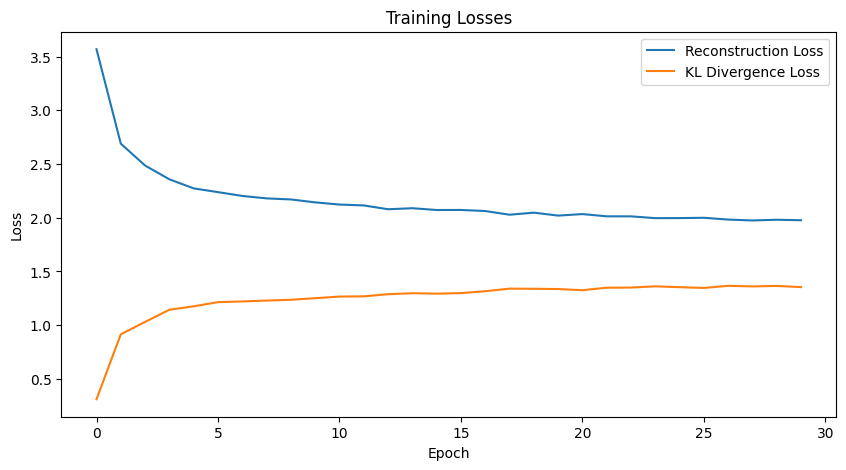

In [593]:
RECOMPUTE = True

BATCH_SIZE = 64

if RECOMPUTE: 
    # Prepare your data
    def convert_dataframes_to_torches(dataframe):
        input_features = ['Origin Lat', 'Origin Lng', 'Destination Lat', 'Destination Lng']
        condition_features = ['Interval', 'Work Day', 'Day of the Week']

        X = torch.FloatTensor(dataframe[input_features].values)
        C = torch.FloatTensor(dataframe[condition_features].values)

        X_mean, X_std = X.mean(dim=0), X.std(dim=0)
        X = (X - X_mean) / X_std
        C_mean, C_std = C.mean(dim=0), C.std(dim=0)
        C = (C - C_mean) / C_std

        dataset = TensorDataset(X, C)
        dataloader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)
        return input_features,condition_features,dataloader, X_mean, X_std, C_mean, C_std

    input_features, condition_features, dataloader, X_mean, X_std, C_mean, C_std = convert_dataframes_to_torches(dataframe=train_df)


    joint_model = CVAE(input_dim, condition_dim, latent_dim, hidden_dim).to(device)

    optimizer = optim.Adam(joint_model.parameters(), lr=1e-3)

    num_epochs = 30

    recon_losses = []
    kl_losses = []
    beta = 1

    for epoch in range(num_epochs):
        epoch_recon_loss = 0
        epoch_kl_loss = 0
        for batch_idx, (x, c) in enumerate(dataloader):
            x, c = x.to(device), c.to(device)
            optimizer.zero_grad()
            recon_x, mu, logvar = joint_model(x, c)
            
            # Reconstruction loss
            recon_loss = F.mse_loss(recon_x, x, reduction='sum')
            
            # KL divergence loss
            kl_loss = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
            
            # Total loss
            loss = recon_loss + beta * kl_loss
            
            loss.backward()
            optimizer.step()
            
            epoch_recon_loss += recon_loss.item()
            epoch_kl_loss += kl_loss.item()
        
        #create a validation step here
        # model.eval()
        
        
        recon_losses.append(epoch_recon_loss / len(dataloader.dataset))
        kl_losses.append(epoch_kl_loss / len(dataloader.dataset))
        print(f'Epoch {epoch+1}, Recon Loss: {recon_losses[-1]:.4f}, KL Loss: {kl_losses[-1]:.4f}')

    # Plotting the losses
    plt.figure(figsize=(10, 5))
    plt.plot(recon_losses, label='Reconstruction Loss')
    plt.plot(kl_losses, label='KL Divergence Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training Losses')
    plt.show()

    #save weights
    torch.save(joint_model.state_dict(), 'learned_model_weights/CVAE_weights.pth')

## Two part CVAE

### pickukp CVAE

In [440]:
#make this all as one encompasing class
pickup_cvae_df = train_df[['Origin Lat', 'Origin Lng','Interval', 'Work Day', 'Day of the Week']]
pickup_cvae_df

,Origin Lat,Origin Lng,Interval,Work Day,Day of the Week
29271,42.370374,-71.117366,335,0,6
10166,42.373340,-71.118547,90,1,2
23106,42.363327,-71.125878,225,1,4
9530,42.388553,-71.119662,80,1,2
32332,42.375741,-71.113776,410,1,3
...,...,...,...,...,...
29802,42.369417,-71.116073,345,1,3
5390,42.364635,-71.118982,40,1,3
860,42.381855,-71.125405,5,1,3
15795,42.379883,-71.118406,145,0,7


In [441]:
from sklearn.preprocessing import StandardScaler


scaler_pickup_x = StandardScaler()
normalized_x = scaler_pickup_x.fit_transform(train_df[['Origin Lat', 'Origin Lng']])

scaler_pickup_c = StandardScaler()
normalized_c = scaler_pickup_c.fit_transform(train_df[['Interval', 'Work Day', 'Day of the Week']])


# Convert normalized data to PyTorch tensors
tensor_x = torch.tensor(normalized_x, dtype=torch.float32)
tensor_c = torch.tensor(normalized_c, dtype=torch.float32)

# Create a TensorDataset
dataset = TensorDataset(tensor_x, tensor_c)

# Create a DataLoader
BATCH_SIZE = 32
dataloader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)

next(iter(dataloader))

[tensor([[-0.0626,  0.6374],
         [ 0.4581,  0.6058],
         [ 0.8366, -0.9454],
         [-0.4377, -0.3544],
         [-1.3386, -0.1323],
         [ 1.5851, -0.3375],
         [-0.3646,  0.0217],
         [-0.2142, -0.4933],
         [-0.4474, -0.4344],
         [-0.0092, -0.1704],
         [ 0.1204,  0.6122],
         [-1.2494, -0.8496],
         [ 0.1317, -0.5991],
         [ 0.3143,  0.6833],
         [ 0.4364,  0.6325],
         [-1.5884, -1.3023],
         [-0.0661, -0.1508],
         [-0.3388, -0.6694],
         [ 0.8949,  1.5812],
         [ 0.3216, -0.6791],
         [ 0.4576,  0.6215],
         [-0.0207, -0.5720],
         [ 1.8875, -0.3322],
         [ 0.0122, -0.3562],
         [-0.0849, -0.6353],
         [-1.5879, -1.8823],
         [-0.4862,  0.0195],
         [ 1.3659, -0.4017],
         [ 0.6606,  0.2068],
         [ 0.5860,  0.2495],
         [ 0.4761,  0.5757],
         [ 0.2972, -0.1434]]),
 tensor([[-1.4194,  0.5919, -1.5428],
         [-1.0184,  0.5919,  0.5

In [442]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
from torchsummary import summary

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print('using device:', device)  

class CVAE(nn.Module):
    def __init__(self, input_dim, condition_dim, latent_dim, hidden_dim, dropout_prob=0.1):
        super(CVAE, self).__init__()
        
        self.input_dim = input_dim
        self.condition_dim = condition_dim
        self.latent_dim = latent_dim
        self.hidden_dim = hidden_dim
        
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim + condition_dim, hidden_dim), #TODO rewrite this to the CONVOLUTIONAL LAYERS!
            nn.ReLU(),
            nn.Dropout(dropout_prob),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(dropout_prob),   # Add dropout layer
        )
        self.fc_mu = nn.Linear(hidden_dim, latent_dim)
        self.fc_logvar = nn.Linear(hidden_dim, latent_dim)
        
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim + condition_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(dropout_prob),   # Add dropout layer
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(dropout_prob),   # Add dropout layer
            nn.Linear(hidden_dim, input_dim),
        )
        
    def encode(self, x, c):
        x = torch.cat([x, c], dim=1)
        h = self.encoder(x)
        return self.fc_mu(h), self.fc_logvar(h)
    
    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std
    
    def decode(self, z, c):
        z = torch.cat([z, c], dim=1)
        return self.decoder(z)
    
    def forward(self, x, c):
        mu, logvar = self.encode(x, c)
        z = self.reparameterize(mu, logvar)
        return self.decode(z, c), mu, logvar
    

# Define the model
input_dim = 2  # Example input dimension for MNIST
condition_dim = 3   # Example condition dimension
latent_dim = 20      # Example latent dimension
hidden_dim = 400     # Example hidden dimension

pickup_cvae = CVAE(input_dim, condition_dim, latent_dim, hidden_dim).to(device)

# Print the model summary
summary(pickup_cvae, [(input_dim,), (condition_dim,)])

using device: cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 400]           2,400
              ReLU-2                  [-1, 400]               0
           Dropout-3                  [-1, 400]               0
            Linear-4                  [-1, 400]         160,400
              ReLU-5                  [-1, 400]               0
           Dropout-6                  [-1, 400]               0
            Linear-7                   [-1, 20]           8,020
            Linear-8                   [-1, 20]           8,020
            Linear-9                  [-1, 400]           9,600
             ReLU-10                  [-1, 400]               0
          Dropout-11                  [-1, 400]               0
           Linear-12                  [-1, 400]         160,400
             ReLU-13                  [-1, 400]               0
          Dropout-14

Epoch 1, Recon Loss: 1.6566, KL Loss: 0.2660
Epoch 2, Recon Loss: 1.3837, KL Loss: 0.4515
Epoch 3, Recon Loss: 1.3505, KL Loss: 0.4670
Epoch 4, Recon Loss: 1.3348, KL Loss: 0.4674
Epoch 5, Recon Loss: 1.3000, KL Loss: 0.4900
Epoch 6, Recon Loss: 1.2559, KL Loss: 0.5161
Epoch 7, Recon Loss: 1.1913, KL Loss: 0.5576
Epoch 8, Recon Loss: 1.1387, KL Loss: 0.5851
Epoch 9, Recon Loss: 1.0757, KL Loss: 0.6274
Epoch 10, Recon Loss: 1.0274, KL Loss: 0.6476
Epoch 11, Recon Loss: 1.0154, KL Loss: 0.6558
Epoch 12, Recon Loss: 1.0137, KL Loss: 0.6663
Epoch 13, Recon Loss: 1.0112, KL Loss: 0.6740
Epoch 14, Recon Loss: 0.9938, KL Loss: 0.6756
Epoch 15, Recon Loss: 0.9998, KL Loss: 0.6643
Epoch 16, Recon Loss: 0.9941, KL Loss: 0.6772
Epoch 17, Recon Loss: 0.9850, KL Loss: 0.6775
Epoch 18, Recon Loss: 0.9918, KL Loss: 0.6797
Epoch 19, Recon Loss: 0.9862, KL Loss: 0.6783
Epoch 20, Recon Loss: 0.9838, KL Loss: 0.6853
Epoch 21, Recon Loss: 0.9836, KL Loss: 0.6901
Epoch 22, Recon Loss: 0.9875, KL Loss: 0.68

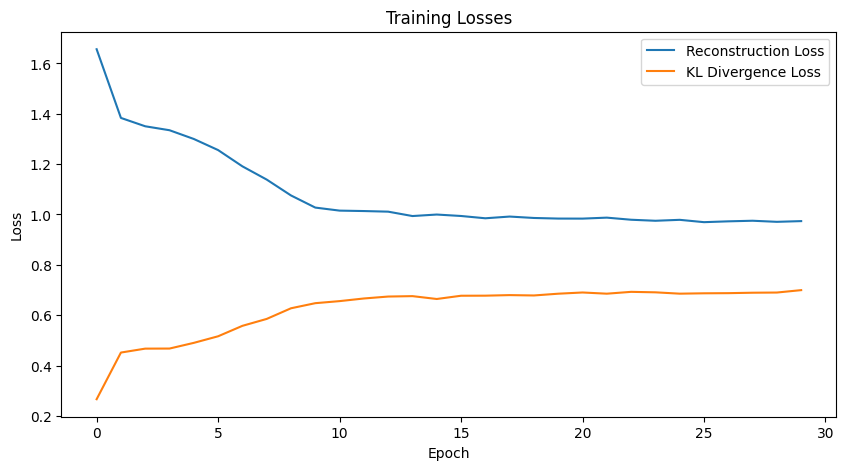

In [443]:
RECOMPUTE = True

if RECOMPUTE: 
    
    pickup_cvae = CVAE(input_dim, condition_dim, latent_dim, hidden_dim).to(device)

    optimizer = optim.Adam(pickup_cvae.parameters(), lr=1e-4)

    num_epochs = 30

    recon_losses = []
    kl_losses = []
    beta = 1

    for epoch in range(num_epochs):
        epoch_recon_loss = 0
        epoch_kl_loss = 0
        for batch_idx, (x, c) in enumerate(dataloader):
            x, c = x.to(device), c.to(device)
            optimizer.zero_grad()
            recon_x, mu, logvar = pickup_cvae(x, c)
            
            recon_loss = F.mse_loss(recon_x, x, reduction='sum')
            
            kl_loss = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
            
            loss = recon_loss + beta * kl_loss
            
            loss.backward()
            optimizer.step()
            
            epoch_recon_loss += recon_loss.item()
            epoch_kl_loss += kl_loss.item()
        
        
        recon_losses.append(epoch_recon_loss / len(dataloader.dataset))
        kl_losses.append(epoch_kl_loss / len(dataloader.dataset))
        print(f'Epoch {epoch+1}, Recon Loss: {recon_losses[-1]:.4f}, KL Loss: {kl_losses[-1]:.4f}')

    plt.figure(figsize=(10, 5))
    plt.plot(recon_losses, label='Reconstruction Loss')
    plt.plot(kl_losses, label='KL Divergence Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training Losses')
    plt.show()

    #save weights
    torch.save(pickup_cvae.state_dict(), 'learned_model_weights/pickup_CVAE_weights.pth')

### dropoff CVAE

In [444]:
dropoff_cvae = train_df[['Destination Lat', 'Destination Lng', 'Origin Lat', 'Origin Lng', ]]
dropoff_cvae

,Destination Lat,Destination Lng,Origin Lat,Origin Lng
29271,42.377580,-71.104120,42.370374,-71.117366
10166,42.378820,-71.104075,42.373340,-71.118547
23106,42.384594,-71.113526,42.363327,-71.125878
9530,42.378957,-71.123690,42.388553,-71.119662
32332,42.364841,-71.111339,42.375741,-71.113776
...,...,...,...,...
29802,42.382769,-71.119096,42.369417,-71.116073
5390,42.372009,-71.120379,42.364635,-71.118982
860,42.374597,-71.118982,42.381855,-71.125405
15795,42.377989,-71.104138,42.379883,-71.118406


In [445]:
from sklearn.preprocessing import StandardScaler

scaler_dropoff_x = StandardScaler()
normalized_x = scaler_dropoff_x.fit_transform(train_df[['Destination Lat', 'Destination Lng']])

scaler_dropoff_c = StandardScaler()
normalized_c = scaler_dropoff_c.fit_transform(train_df[['Origin Lat', 'Origin Lng']])

tensor_x = torch.tensor(normalized_x, dtype=torch.float32)
tensor_c = torch.tensor(normalized_c, dtype=torch.float32)

# Create a TensorDataset
dataset = TensorDataset(tensor_x, tensor_c)

# Create a DataLoader
BATCH_SIZE = 32
dataloader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)

next(iter(dataloader))

[tensor([[-0.1250, -0.3564],
         [ 0.1530,  1.4949],
         [ 0.6053,  1.4470],
         [ 0.6565,  1.4613],
         [-0.9529, -0.6596],
         [-1.0952, -0.4328],
         [-1.1443,  0.1423],
         [ 0.6535,  1.4873],
         [-1.1443,  0.1423],
         [ 1.0747, -1.0140],
         [ 1.3969,  0.2443],
         [-0.1668, -0.6905],
         [-0.5226,  0.8196],
         [ 0.8441,  0.9883],
         [-1.4584, -1.1582],
         [ 1.1711, -1.6642],
         [-0.6493,  0.1588],
         [ 1.0455, -1.0096],
         [-1.2652, -0.3041],
         [-1.0593,  0.1849],
         [ 0.6067,  0.9613],
         [-0.0794,  1.8785],
         [ 1.8978, -0.3341],
         [ 1.1610, -0.3217],
         [-1.0594,  0.1662],
         [-0.6900,  0.0459],
         [ 1.1225, -0.9956],
         [ 1.1033,  0.5791],
         [ 0.3957,  0.9948],
         [ 0.6743, -1.1021],
         [ 1.0861,  0.6050],
         [-0.2945,  0.2007]]),
 tensor([[-1.1573, -0.9021],
         [-0.2809, -0.6992],
         [-1

In [446]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
from torchsummary import summary

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print('using device:', device)  

class CVAE(nn.Module):
    def __init__(self, input_dim, condition_dim, latent_dim, hidden_dim, dropout_prob=0.1):
        super(CVAE, self).__init__()
        
        self.input_dim = input_dim
        self.condition_dim = condition_dim
        self.latent_dim = latent_dim
        self.hidden_dim = hidden_dim
        
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim + condition_dim, hidden_dim), #TODO rewrite this to the CONVOLUTIONAL LAYERS!
            nn.ReLU(),
            nn.Dropout(dropout_prob),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(dropout_prob),   # Add dropout layer
        )
        self.fc_mu = nn.Linear(hidden_dim, latent_dim)
        self.fc_logvar = nn.Linear(hidden_dim, latent_dim)
        
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim + condition_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(dropout_prob),   # Add dropout layer
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(dropout_prob),   # Add dropout layer
            nn.Linear(hidden_dim, input_dim),
        )
        
    def encode(self, x, c):
        x = torch.cat([x, c], dim=1)
        h = self.encoder(x)
        return self.fc_mu(h), self.fc_logvar(h)
    
    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std
    
    def decode(self, z, c):
        z = torch.cat([z, c], dim=1)
        return self.decoder(z)
    
    def forward(self, x, c):
        mu, logvar = self.encode(x, c)
        z = self.reparameterize(mu, logvar)
        return self.decode(z, c), mu, logvar
    

# Define the model
input_dim = 2  # Example input dimension for MNIST
condition_dim = 2   # Example condition dimension
latent_dim = 20      # Example latent dimension
hidden_dim = 200     # Example hidden dimension

dropoff_cvae = CVAE(input_dim, condition_dim, latent_dim, hidden_dim).to(device)

# Print the model summary
summary(dropoff_cvae, [(input_dim,), (condition_dim,)])

using device: cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 200]           1,000
              ReLU-2                  [-1, 200]               0
           Dropout-3                  [-1, 200]               0
            Linear-4                  [-1, 200]          40,200
              ReLU-5                  [-1, 200]               0
           Dropout-6                  [-1, 200]               0
            Linear-7                   [-1, 20]           4,020
            Linear-8                   [-1, 20]           4,020
            Linear-9                  [-1, 200]           4,600
             ReLU-10                  [-1, 200]               0
          Dropout-11                  [-1, 200]               0
           Linear-12                  [-1, 200]          40,200
             ReLU-13                  [-1, 200]               0
          Dropout-14

Epoch 1, Recon Loss: 1.9092, KL Loss: 0.0796
Epoch 2, Recon Loss: 1.5453, KL Loss: 0.3270
Epoch 3, Recon Loss: 1.3912, KL Loss: 0.4416
Epoch 4, Recon Loss: 1.3519, KL Loss: 0.4582
Epoch 5, Recon Loss: 1.3116, KL Loss: 0.4828
Epoch 6, Recon Loss: 1.2519, KL Loss: 0.5229
Epoch 7, Recon Loss: 1.1572, KL Loss: 0.5766
Epoch 8, Recon Loss: 1.0826, KL Loss: 0.6206
Epoch 9, Recon Loss: 1.0618, KL Loss: 0.6412
Epoch 10, Recon Loss: 1.0352, KL Loss: 0.6487
Epoch 11, Recon Loss: 1.0233, KL Loss: 0.6516
Epoch 12, Recon Loss: 1.0292, KL Loss: 0.6570
Epoch 13, Recon Loss: 1.0204, KL Loss: 0.6589
Epoch 14, Recon Loss: 1.0046, KL Loss: 0.6558
Epoch 15, Recon Loss: 1.0054, KL Loss: 0.6590
Epoch 16, Recon Loss: 0.9977, KL Loss: 0.6641
Epoch 17, Recon Loss: 0.9934, KL Loss: 0.6662
Epoch 18, Recon Loss: 0.9901, KL Loss: 0.6679
Epoch 19, Recon Loss: 0.9805, KL Loss: 0.6718
Epoch 20, Recon Loss: 0.9793, KL Loss: 0.6643
Epoch 21, Recon Loss: 0.9820, KL Loss: 0.6805
Epoch 22, Recon Loss: 0.9712, KL Loss: 0.67

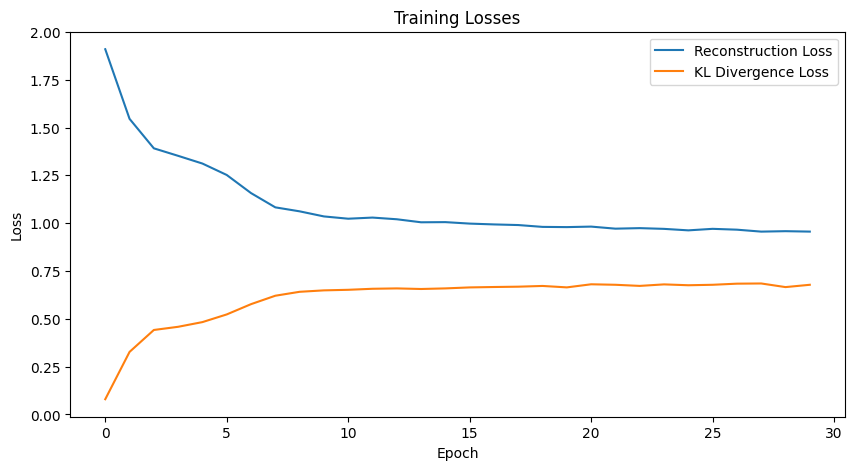

In [447]:
RECOMPUTE = True

if RECOMPUTE: 
    
    dropoff_cvae = CVAE(input_dim, condition_dim, latent_dim, hidden_dim).to(device)

    optimizer = optim.Adam(dropoff_cvae.parameters(), lr=1e-4)

    num_epochs = 30

    recon_losses = []
    kl_losses = []
    beta = 1

    for epoch in range(num_epochs):
        epoch_recon_loss = 0
        epoch_kl_loss = 0
        for batch_idx, (x, c) in enumerate(dataloader):
            x, c = x.to(device), c.to(device)
            optimizer.zero_grad()
            recon_x, mu, logvar = dropoff_cvae(x, c)
            
            recon_loss = F.mse_loss(recon_x, x, reduction='sum')
            
            kl_loss = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
            
            loss = recon_loss + beta * kl_loss
            
            loss.backward()
            optimizer.step()
            
            epoch_recon_loss += recon_loss.item()
            epoch_kl_loss += kl_loss.item()
        
        
        recon_losses.append(epoch_recon_loss / len(dataloader.dataset))
        kl_losses.append(epoch_kl_loss / len(dataloader.dataset))
        print(f'Epoch {epoch+1}, Recon Loss: {recon_losses[-1]:.4f}, KL Loss: {kl_losses[-1]:.4f}')

    plt.figure(figsize=(10, 5))
    plt.plot(recon_losses, label='Reconstruction Loss')
    plt.plot(kl_losses, label='KL Divergence Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training Losses')
    plt.show()

    #save weights
    torch.save(pickup_cvae.state_dict(), 'learned_model_weights/pickup_CVAE_weights.pth')

### generate method

In [448]:
def generate_new_data_two_part_cvae(input_conditon, num_samples=1):
    with torch.no_grad():
        
        z_pickup = torch.randn(num_samples, pickup_cvae.latent_dim).to(device)
        z_dropoff = torch.randn(num_samples, dropoff_cvae.latent_dim).to(device)
        
        condtion = scaler_pickup_c.transform(input_conditon)
        condtion = torch.FloatTensor(input_conditon).to(device).repeat(num_samples, 1)
        pickups = pickup_cvae.decode(z_pickup, condtion)
        
        dropoffs = dropoff_cvae.decode(z_dropoff, pickups)
        
        pickups = scaler_pickup_x.inverse_transform(pickups.cpu().numpy())
        dropoffs = scaler_dropoff_x.inverse_transform(dropoffs.cpu().numpy())      
        combined_data = np.concatenate((pickups, dropoffs), axis=1)
    
    return combined_data

condtion = torch.FloatTensor([[0, 1, 5]])

generate_new_data_two_part_cvae(condtion, num_samples=1)

array([[ 42.3683  , -71.12099 ,  42.374825, -71.1072  ]], dtype=float32)

try CVAE different resultions and different condtional labels
compute MSE multiple times to see if this is correct
compute MED for the actuall full distirbution
compute the resutls for both the pickup and drop off locations
add cvae and gmm results in a table
make a nice graphic with trained GMM model
wandb hpyerparameters search
create hyperaparemters search like plotly graph

# Data Ploting

## spatial comparison

tensor([[210.,   1.,   4.]])

cuda
cuda
cuda


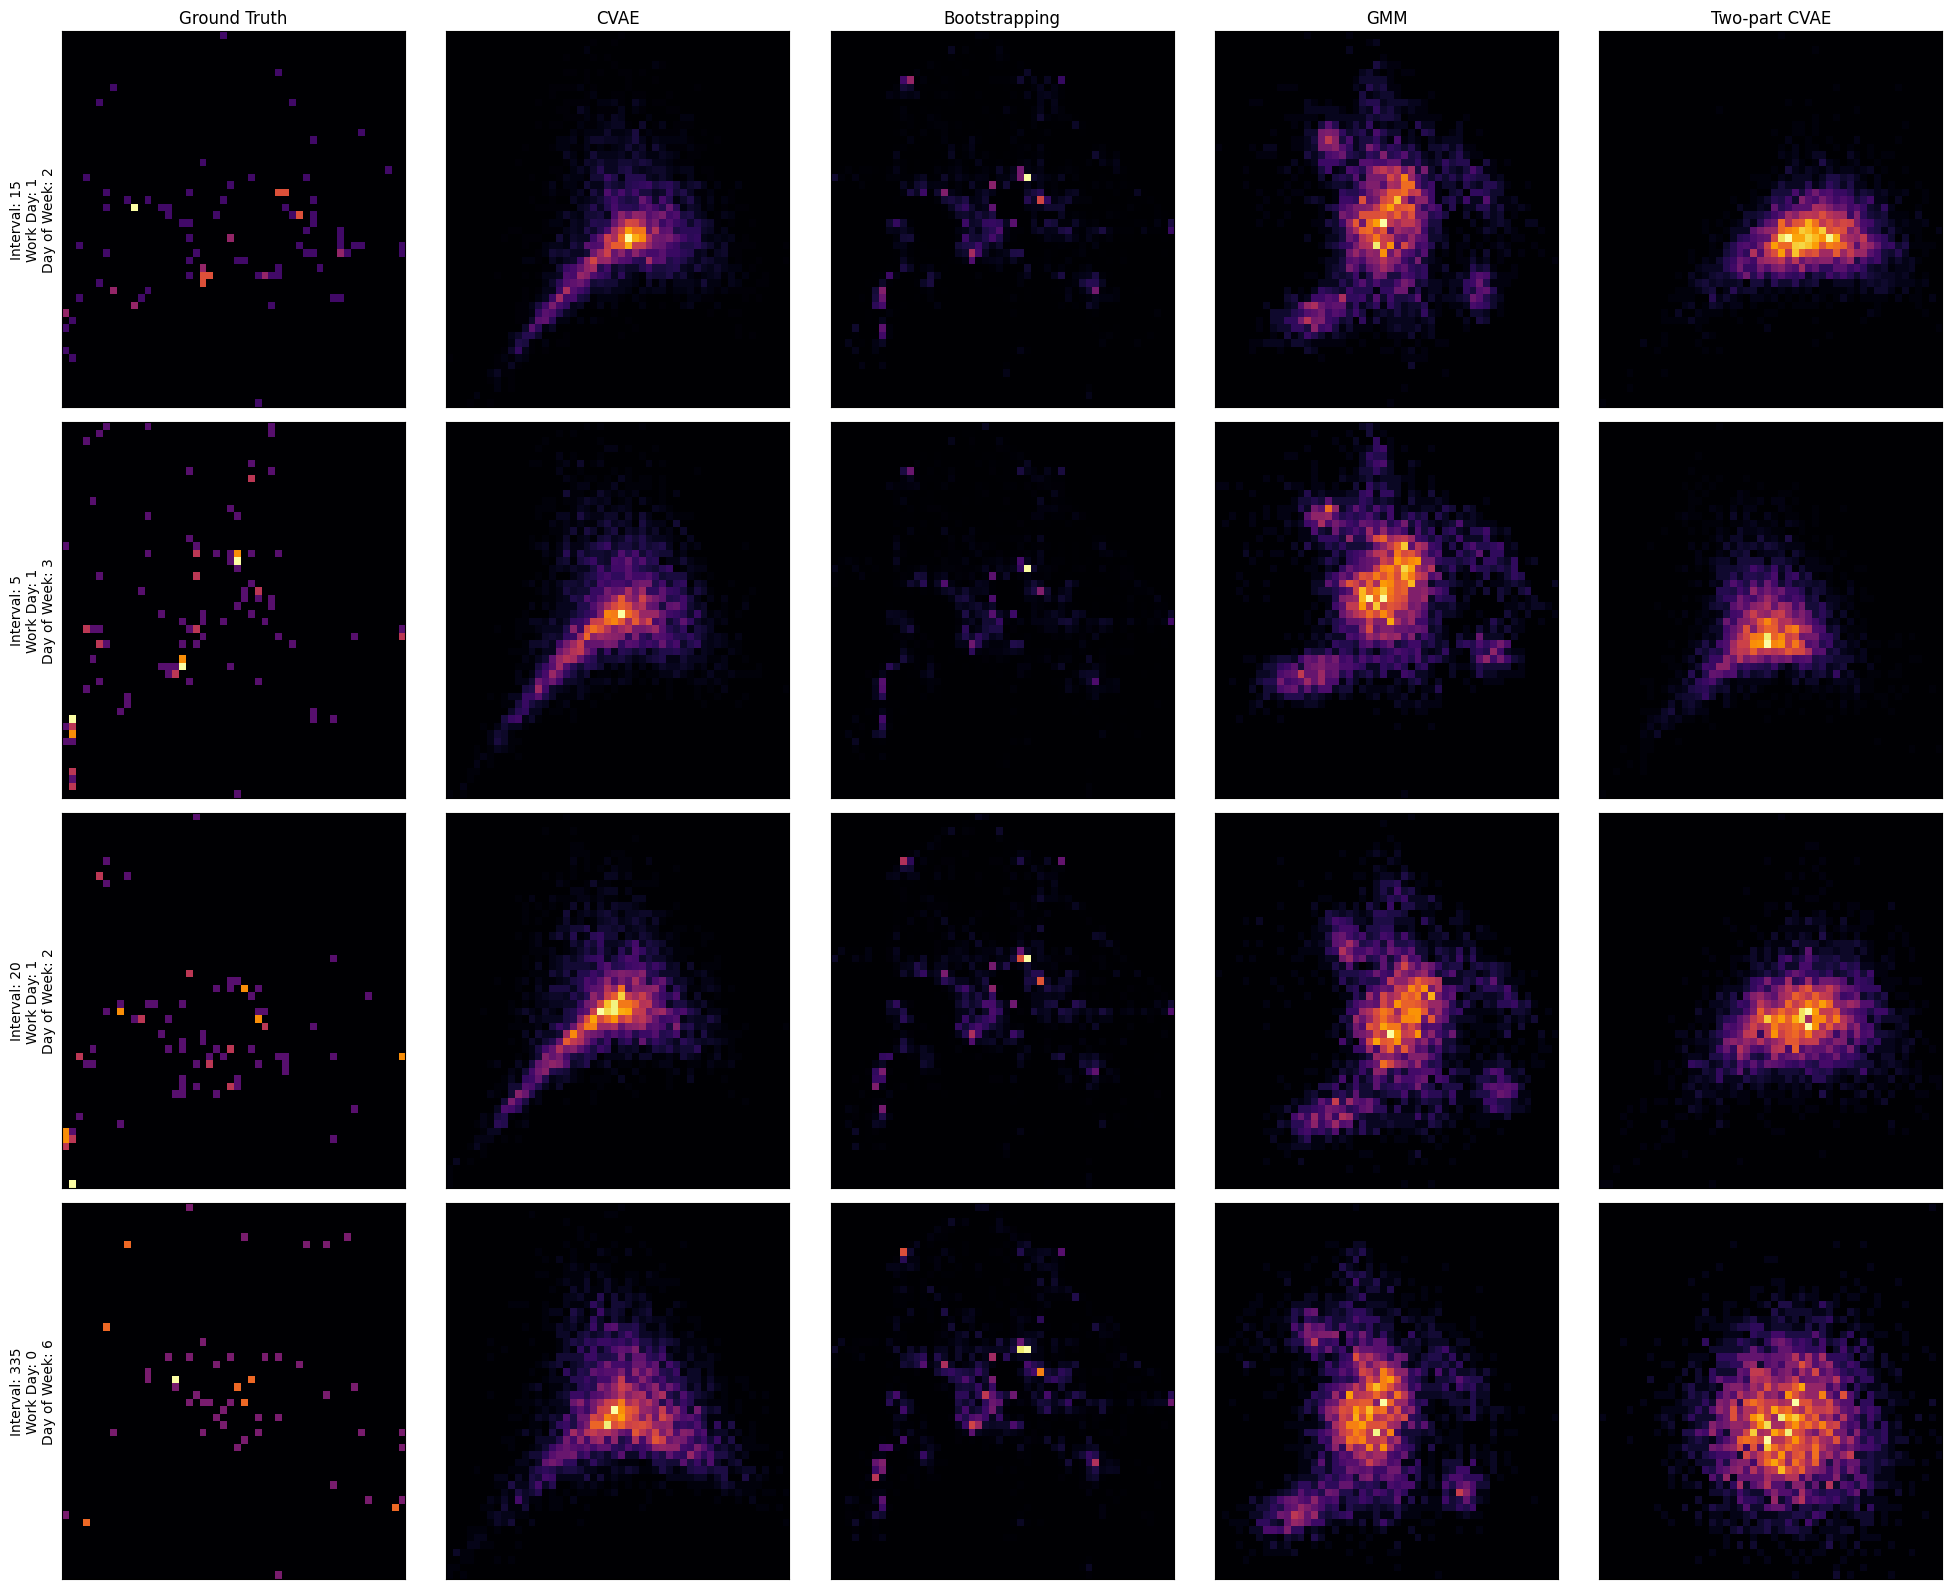

In [662]:
import osmnx as ox
import numpy as np
import matplotlib.pyplot as plt
import ot

BINS = 50

BINS = 50

def emd_2d_pot(hist1, hist2, bin_size=1):
    hist1 = hist1 / np.sum(hist1)
    hist2 = hist2 / np.sum(hist2)
    
    y, x = np.indices(hist1.shape)
    coords = np.column_stack((x.ravel(), y.ravel()))
    
    M = ot.dist(coords * bin_size, coords * bin_size, metric='euclidean')
    
    emd = ot.emd2(hist1.ravel(), hist2.ravel(), M)
    
    return emd


def generate_new_data(model, condition, num_samples=1):
    with torch.no_grad():
        z = torch.randn(num_samples, model.latent_dim).to(device)
        c = (condition - C_mean) / C_std  # Normalize condition
        c = c.repeat(num_samples, 1).to(device)
        generated = model.decode(z, c)
        generated = generated * X_std.to(device) + X_mean.to(device)  # Denormalize output
    return generated.cpu().numpy()

print(device)


# [Keep all the existing function definitions: emd_2d_pot, generate_new_data, etc.]

print(device)
import osmnx as ox
import numpy as np
import matplotlib.pyplot as plt
import ot

BINS = 50

# [Keep all the existing function definitions: emd_2d_pot, generate_new_data, etc.]

print(device)

# Adjust figure size to make room for square subplots
fig, axes = plt.subplots(4, 5, figsize=(20, 16))


hist_df = filtered_df.to_numpy()
samples_num = len(hist_df)
heatmap_realized, xedges, yedges = np.histogram2d(hist_df[:, 0], hist_df[:, 1], bins=BINS)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    
for i in range(4):
    sampled_row = df.sample()[['Interval', 'Work Day', 'Day of the Week']]
    new_condition = torch.FloatTensor(sampled_row.values)

    filtered_df = df[(df['Interval'] == new_condition[0, 0].item()) & 
                    (df['Work Day'] == new_condition[0, 1].item()) & 
                    (df['Day of the Week'] == new_condition[0, 2].item())]

    hist_df = filtered_df.to_numpy()
    samples_num = len(hist_df)
    heatmap_realized, xedges, yedges = np.histogram2d(hist_df[:, 0], hist_df[:, 1], bins=BINS)

    # Ground Truth
    im = axes[i, 0].imshow(heatmap_realized.T, extent=extent, origin='lower', cmap='inferno', aspect='auto')
    
    # CVAE
    data_to_plot = generate_new_data(joint_model, new_condition, num_samples=5000)
    heatmap_predicted, _, _ = np.histogram2d(data_to_plot[:, 0], data_to_plot[:, 1], bins=BINS)
    axes[i, 1].imshow(heatmap_predicted.T, extent=extent, origin='lower', cmap='inferno', aspect='auto')

    # Bootstrapping
    bootstrap_sample = df.sample(n=5000, replace=True).to_numpy()
    heatmap_predicted, _, _ = np.histogram2d(bootstrap_sample[:, 0], bootstrap_sample[:, 1], bins=BINS)
    axes[i, 2].imshow(heatmap_predicted.T, extent=extent, origin='lower', cmap='inferno', aspect='auto')

    # GMM
    X_gmm_generated = gmm.sample(5000)[0]
    heatmap_predicted, _, _ = np.histogram2d(X_gmm_generated[:, 1], X_gmm_generated[:, 0], bins=BINS)
    axes[i, 3].imshow(heatmap_predicted.T, extent=extent, origin='lower', cmap='inferno', aspect='auto')

    # Two-part CVAE
    data_to_plot = generate_new_data_two_part_cvae(new_condition, num_samples=5000)
    heatmap_predicted, _, _ = np.histogram2d(data_to_plot[:, 0], data_to_plot[:, 1], bins=BINS)
    axes[i, 4].imshow(heatmap_predicted.T, extent=extent, origin='lower', cmap='inferno', aspect='auto')

    # Add row title
    axes[i, 0].set_ylabel(f'Interval: {new_condition[0,0].item():.0f}\nWork Day: {new_condition[0,1].item():.0f}\nDay of Week: {new_condition[0,2].item():.0f}', fontsize=10)

# Remove x and y ticks for clarity and set aspect ratio to equal
for ax in axes.flatten():
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal', adjustable='box')

# Add column titles
column_titles = ['Ground Truth', 'CVAE', 'Bootstrapping', 'GMM', 'Two-part CVAE']
for ax, title in zip(axes[0], column_titles):
    ax.set_title(title)

plt.tight_layout()
plt.show()
fig.savefig('final_results/heatmaps_of_generative_spatial_distributions_4x5_square.png', bbox_inches='tight', dpi=300)

try CVAE different resultions and different condtional labels
compute MSE multiple times to see if this is correct
compute MED for the actuall full distirbution
compute the resutls for both the pickup and drop off locations
add cvae and gmm results in a table
make a nice graphic with trained GMM model
wandb hpyerparameters search
create hyperaparemters search like plotly graph

## final results

In [595]:
test_df

,Origin Lat,Origin Lng,Destination Lat,Destination Lng,Interval,Work Day,Day of the Week
27486,42.382752,-71.119157,42.369926,-71.116813,300,0,6
19444,42.377507,-71.105603,42.378957,-71.123691,185,1,1
30858,42.375664,-71.113813,42.364444,-71.112427,365,1,2
19496,42.371257,-71.118938,42.375761,-71.124127,185,1,3
5038,42.370579,-71.116303,42.375457,-71.124482,40,0,7
...,...,...,...,...,...,...,...
18250,42.370760,-71.113784,42.381987,-71.129606,170,1,4
15188,42.366714,-71.120285,42.368110,-71.114449,140,1,3
14740,42.371656,-71.121012,42.365259,-71.107675,135,1,3
2201,42.374075,-71.113883,42.364738,-71.118950,15,1,4


In [607]:
from tqdm import tqdm
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
import itertools
import warnings
from sklearn.metrics import mean_absolute_error

def haversine_distance(coord1, coord2):
    """
    Calculate the Haversine distance between two points on the Earth.
    
    Parameters:
    coord1, coord2: numpy arrays of shape (n, 2) where each row is (latitude, longitude)
    
    Returns:
    distances: numpy array of shape (n,) containing the distances
    """
    # Convert latitude and longitude from degrees to radians
    lat1, lon1 = np.radians(coord1[:, 0]), np.radians(coord1[:, 1])
    lat2, lon2 = np.radians(coord2[:, 0]), np.radians(coord2[:, 1])
    
    # Compute differences
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    
    # Haversine formula
    a = np.sin(dlat / 2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))
    
    # Radius of Earth in kilometers (mean radius)
    R = 6371000.0
    distances = R * c
    
    return distances

warnings.filterwarnings('ignore')

# TODO condition on less things
new_condition = test_df[['Interval', 'Work Day', 'Day of the Week']]
# TODO this should be done on the test dataset!
grouped = test_df.groupby(['Interval', 'Work Day', 'Day of the Week']).size().reset_index(name='Count')
grouped.to_numpy()

# TODO automatically select the smallest graph
plot_cvae = []
plot_bootstrap = []

main_keys = ['spatial', 'temporal']
models = ['cvae', 'gmm', 'bootstraping', 'twopart']
event_types = ['pickup', 'dropoff']

results = defaultdict(lambda: defaultdict(lambda: defaultdict(list)))

for main_key, model, event in itertools.product(main_keys, models, event_types):
    results[main_key][model][event] = []


for condition_and_count in tqdm(grouped.to_numpy()[:100]): #TODO THERE IS A CUTOOF VALUE HERE
    new_condition = torch.FloatTensor([condition_and_count[:3]])
    samples = condition_and_count[3]
    
    filtered_df = test_df[(test_df['Interval'] == new_condition[0, 0].item()) & 
                          (test_df['Work Day'] == new_condition[0, 1].item()) & 
                          (test_df['Day of the Week'] == new_condition[0, 2].item())]
    
    hist_df = filtered_df.to_numpy()
    heatmap_realized, _, _ = np.histogram2d(hist_df[:, 0], hist_df[:, 1], bins=BINS)


    data_to_plot = generate_new_data(joint_model, new_condition, num_samples=samples)
    heatmap_predicted, _, _ = np.histogram2d(data_to_plot[:, 0], data_to_plot[:, 1], bins=BINS)
    dist = emd_2d_pot(heatmap_predicted, heatmap_realized)
    results['spatial']['cvae']['pickup'].append(dist)
    
    heatmap_predicted, _, _ = np.histogram2d(data_to_plot[:, 2], data_to_plot[:, 3], bins=BINS)
    dist = emd_2d_pot(heatmap_predicted, heatmap_realized)
    results['spatial']['cvae']['dropoff'].append(dist)
    
    
    results['temporal']['cvae']['pickup'].append(np.mean(haversine_distance(hist_df[:, :2], data_to_plot[:, :2])))
    results['temporal']['cvae']['dropoff'].append(np.mean(haversine_distance(hist_df[:, 2:4], data_to_plot[:, 2:4])))
    
    
    data_to_plot = generate_new_data_two_part_cvae(new_condition, num_samples=samples)
    heatmap_predicted, _, _ = np.histogram2d(data_to_plot[:, 0], data_to_plot[:, 1], bins=BINS)
    dist = emd_2d_pot(heatmap_predicted, heatmap_realized)
    results['spatial']['twopart']['pickup'].append(dist)
    
    heatmap_predicted, _, _ = np.histogram2d(data_to_plot[:, 2], data_to_plot[:, 3], bins=BINS)
    dist = emd_2d_pot(heatmap_predicted, heatmap_realized)
    results['spatial']['twopart']['dropoff'].append(dist)
    results['temporal']['twopart']['pickup'].append(np.mean(haversine_distance(hist_df[:, :2], data_to_plot[:, :2])))
    results['temporal']['twopart']['dropoff'].append(np.mean(haversine_distance(hist_df[:, 2:4], data_to_plot[:, 2:4])))
    

    bootstrap_sample = df.sample(n=samples, replace=True).to_numpy()
    heatmap_predicted, _, _ = np.histogram2d(bootstrap_sample[:, 0], bootstrap_sample[:, 1], bins=BINS)
    dist = emd_2d_pot(heatmap_predicted, heatmap_realized)
    results['spatial']['bootstraping']['pickup'].append(dist)
    heatmap_predicted, _, _ = np.histogram2d(bootstrap_sample[:, 2], bootstrap_sample[:, 3], bins=BINS)
    dist = emd_2d_pot(heatmap_predicted, heatmap_realized)
    results['spatial']['bootstraping']['dropoff'].append(dist)
        
    results['temporal']['bootstraping']['pickup'].append(np.mean(haversine_distance(hist_df[:, :2], bootstrap_sample[:, :2])))
    results['temporal']['bootstraping']['dropoff'].append(np.mean(haversine_distance(hist_df[:, 2:4], bootstrap_sample[:, 2:4])))
    
    
    gmm_generated = gmm.sample(samples)[0]
    heatmap_predicted, _, _ = np.histogram2d(gmm_generated[:, 0], gmm_generated[:, 1], bins=BINS)
    dist = emd_2d_pot(heatmap_predicted, heatmap_realized)
    results['spatial']['gmm']['pickup'].append(dist)
    heatmap_predicted, _, _ = np.histogram2d(gmm_generated[:, 2], gmm_generated[:, 3], bins=BINS)
    dist = emd_2d_pot(heatmap_predicted, heatmap_realized)
    results['spatial']['gmm']['dropoff'].append(dist)
    

    results['temporal']['gmm']['pickup'].append(np.mean(haversine_distance(hist_df[:, :2], gmm_generated[:, :2])))
    results['temporal']['gmm']['dropoff'].append(np.mean(haversine_distance(hist_df[:, 2:4], gmm_generated[:, 2:4])))
    
    
# results_df = pd.DataFrame.from_dict(results, orient='index')
# results_df change this to use mea

100%|██████████| 100/100 [01:05<00:00,  1.52it/s]


In [611]:
# Convert defaultdict to a regular dict
results_dict = {k: dict(v) for k, v in results.items()}
results_dict = {k: {sk: dict(sv) for sk, sv in v.items()} for k, v in results_dict.items()}

# Flatten the nested dictionary and create a DataFrame
results_df = pd.json_normalize(results_dict, sep='_')

# Transpose the DataFrame
results_df_transposed = results_df.transpose()

# Print the transposed DataFrame to verify
results_df_transposed

,0
spatial_cvae_pickup,"[18.360235290185564, 10.527558237076667, 6.599..."
spatial_cvae_dropoff,"[10.381208451630146, 9.811153648851374, 23.006..."
spatial_gmm_pickup,"[12.577437843397902, 8.412958343329239, 13.044..."
spatial_gmm_dropoff,"[12.102099690163472, 9.69376651746086, 14.2209..."
spatial_bootstraping_pickup,"[10.36927693961706, 8.91909308571319, 14.68378..."
spatial_bootstraping_dropoff,"[13.250810818566059, 11.42785462136066, 15.855..."
spatial_twopart_pickup,"[9.760282703916694, 10.230533310418071, 12.758..."
spatial_twopart_dropoff,"[12.536474268301706, 7.376688435853984, 11.182..."
temporal_cvae_pickup,"[1032.8008016392948, 985.871324541558, 898.071..."
temporal_cvae_dropoff,"[1126.5403265335603, 1382.1889248188024, 1283...."


instead of MSE for analysing here add the distance in the meters

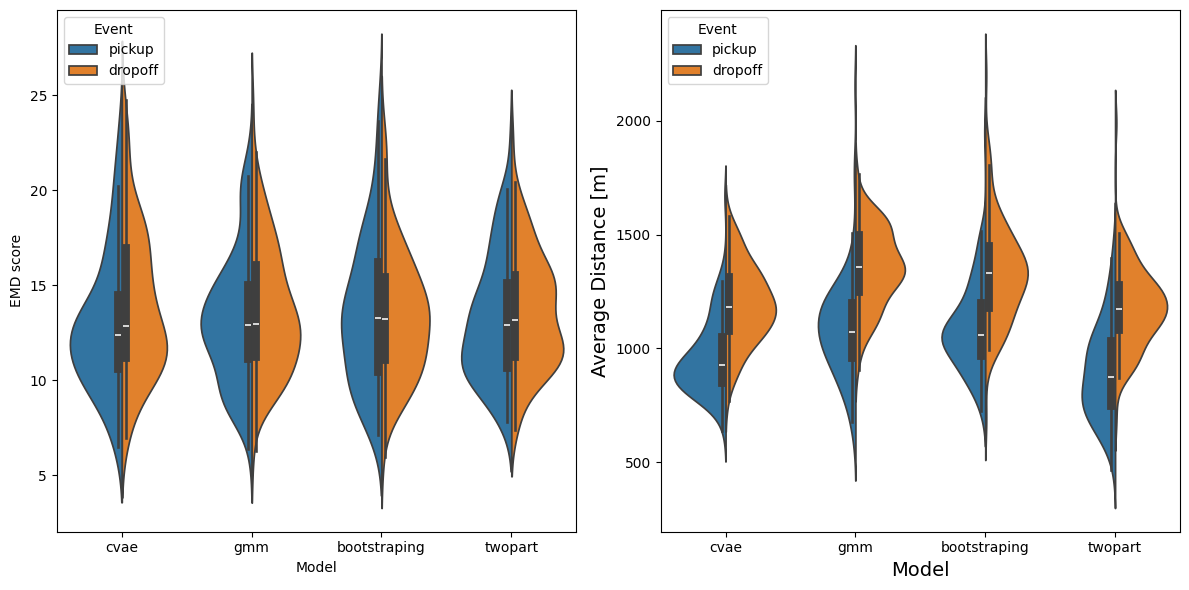

In [665]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming results_df_transposed is already defined
# Filter the DataFrame to include only rows that start with 'spatial' and 'temporal'
spatial_df = results_df_transposed.filter(like='spatial', axis=0)
temporal_df = results_df_transposed.filter(like='temporal', axis=0)

# Convert the filtered DataFrames into formats suitable for plotting
spatial_data = spatial_df.apply(pd.Series.explode).reset_index()
spatial_data.columns = ['Category', 'Value']
temporal_data = temporal_df.apply(pd.Series.explode).reset_index()
temporal_data.columns = ['Category', 'Value']

# Extract model name and event type
spatial_data['Model'] = spatial_data['Category'].apply(lambda x: x.split('_')[1])
spatial_data['Event'] = spatial_data['Category'].apply(lambda x: x.split('_')[2])
temporal_data['Model'] = temporal_data['Category'].apply(lambda x: x.split('_')[1])
temporal_data['Event'] = temporal_data['Category'].apply(lambda x: x.split('_')[2])

# Convert Value to numeric
spatial_data['Value'] = pd.to_numeric(spatial_data['Value'], errors='coerce')
temporal_data['Value'] = pd.to_numeric(temporal_data['Value'], errors='coerce')

# Create a 2 by 1 figure
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Create the violin plot for spatial data
sns.violinplot(ax=axes[0], x='Model', y='Value', hue='Event', data=spatial_data, split=True)
axes[0].set_xlabel('Model')
axes[0].set_ylabel('EMD score')
axes[0].legend(title='Event', loc='upper left')

# Create the violin plot for temporal data
sns.violinplot(ax=axes[1], x='Model', y='Value', hue='Event', data=temporal_data, split=True)
axes[1].set_xlabel('Model', fontsize=14)
axes[1].set_ylabel('Average Distance [m]', fontsize=14)
axes[1].legend(title='Event', loc='upper left')

plt.tight_layout()
plt.show()
fig.savefig('final_results/bar_plot_comparison_of_EMD_and_MSE_for_generative_models.png')

try CVAE different resultions and different condtional labels
compute MSE multiple times to see if this is correct
compute MED for the actuall full distirbution
compute the resutls for both the pickup and drop off locations
add cvae and gmm results in a table
make a nice graphic with trained GMM model
wandb hpyerparameters search
create hyperaparemters search like plotly graph

In [ ]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Convert the 'spatial' and 'temporal' results to DataFrames
# df_spatial = pd.DataFrame(results['spatial'])
# df_temporal = pd.DataFrame(results['temporal'])

# # Define a color palette
# palette = sns.color_palette("husl", len(df_spatial.columns))

# # Create the box plots side by side
# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 7), dpi=300)

# # Box plot for 'spatial' results using seaborn
# sns.boxplot(data=df_spatial, ax=axes[0], palette=palette)
# axes[0].set_title(f'cvae improvement over boststrapping in EMD: {(1-np.mean(results["spatial"]["cvae"])/np.mean(results["spatial"]["boststrapping"]))*100:.1f}%')
# axes[0].set_xlabel('Methods')
# axes[0].set_ylabel('Wasserstein Distance (EMD distance)')
# axes[0].tick_params(axis='x', rotation=45)
# axes[0].grid(False)  # Remove grid

# # Box plot for 'temporal' results using seaborn
# sns.boxplot(data=df_temporal, ax=axes[1], palette=palette)
# axes[1].set_title(f'cvae improvement over boststrapping MSE: {(1-np.mean(results["temporal"]["cvae"])/np.mean(results["temporal"]["boststrapping"]))*100:.1f}%')
# axes[1].set_xlabel('Methods')
# axes[1].set_ylabel('MSE values')
# axes[1].tick_params(axis='x', rotation=45)
# axes[1].grid(False)  # Remove grid

# # Adjust layout
# plt.tight_layout()
# plt.show()

# # Save this graphic
# fig.savefig('final_results/bar_plot_comparison_of_EMD_and_MSE_for_generative_models.png')

add accuracy results for both pickup and dropoffs here in two MSE and EMD catagories for each method

In [ ]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


## hyperparameter search

In [549]:
import torch.optim.lr_scheduler as lr_scheduler
import random


### one part CVAE

In [622]:
num_epochs = 30
N = 20

BETA =1
WEGIHT_DECAY = 0.01

latent_dim = 10      # Example latent dimension
hidden_dim = 400     # Example hidden dimension

def random_experiments(n):
    latent_dims = [2, 4, 10, 20]
    hidden_dims = [32, 64, 128, 256]
    batch_sizes = [8, 16, 32, 64, 128]
    learning_rates = [1e-5, 5e-5, 1e-4, 5e-4, 1e-3, 5e-3]
    
    for _ in tqdm(range(n), desc='Experiment'):
        latent_dim = random.choice(latent_dims)
        hidden_dim = random.choice(hidden_dims)
        BATCH_SIZE = random.choice(batch_sizes)
        LR = random.choice(learning_rates)
        yield (latent_dim, hidden_dim, BATCH_SIZE, LR)

hyperparameter_results = pd.DataFrame(columns=['latent_dim', 
                                               'hidden_dim', 
                                               'BATCH_SIZE', 
                                               'LR'])

for latent_dim, hidden_dim, BATCH_SIZE, LR in random_experiments(N):
    # print(f'latent_dim: {latent_dim}, hidden_dim: {hidden_dim}, num_epochs: {num_epochs}, BATCH_SIZE: {BATCH_SIZE}, LR: {LR}, BETA: {BETA}, WEGIHT_DECAY: {WEGIHT_DECAY}')
    
    class CVAE(nn.Module):
        def __init__(self, input_dim, condition_dim, latent_dim, hidden_dim, dropout_prob=0.1):
            super(CVAE, self).__init__()
            self.input_dim = input_dim
            self.condition_dim = condition_dim
            self.latent_dim = latent_dim
            self.hidden_dim = hidden_dim
            self.encoder = nn.Sequential(
                nn.Linear(input_dim + condition_dim, hidden_dim), #TODO rewrite this to the CONVOLUTIONAL LAYERS!
                nn.ReLU(),
                nn.Dropout(dropout_prob),
                nn.Linear(hidden_dim, hidden_dim),
                nn.ReLU(),
                nn.Dropout(dropout_prob),   # Add dropout layer
            )
            self.fc_mu = nn.Linear(hidden_dim, latent_dim)
            self.fc_logvar = nn.Linear(hidden_dim, latent_dim)
            
            self.decoder = nn.Sequential(
                nn.Linear(latent_dim + condition_dim, hidden_dim),
                nn.ReLU(),
                nn.Dropout(dropout_prob),   # Add dropout layer
                nn.Linear(hidden_dim, hidden_dim),
                nn.ReLU(),
                nn.Dropout(dropout_prob),   # Add dropout layer
                nn.Linear(hidden_dim, input_dim),
            )
            
        def encode(self, x, c):
            x = torch.cat([x, c], dim=1)
            h = self.encoder(x)
            return self.fc_mu(h), self.fc_logvar(h)
        
        def reparameterize(self, mu, logvar):
            std = torch.exp(0.5 * logvar)
            eps = torch.randn_like(std)
            return mu + eps * std
        
        def decode(self, z, c):
            z = torch.cat([z, c], dim=1)
            return self.decoder(z)
        
        def forward(self, x, c):
            mu, logvar = self.encode(x, c)
            z = self.reparameterize(mu, logvar)
            return self.decode(z, c), mu, logvar
    
    def count_parameters(model):
        return sum(p.numel() for p in model.parameters() if p.requires_grad)

    input_dim = 4  # Example input dimension for MNIST
    condition_dim = 3   # Example condition dimension


    def convert_dataframes_to_torches(dataframe):
        input_features = ['Origin Lat', 'Origin Lng', 'Destination Lat', 'Destination Lng']
        condition_features = ['Interval', 'Work Day', 'Day of the Week']

        X = torch.FloatTensor(dataframe[input_features].values)
        C = torch.FloatTensor(dataframe[condition_features].values)

        X_mean, X_std = X.mean(dim=0), X.std(dim=0)
        X = (X - X_mean) / X_std
        C_mean, C_std = C.mean(dim=0), C.std(dim=0)
        C = (C - C_mean) / C_std

        dataset = TensorDataset(X, C)
        dataloader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)
        return input_features,condition_features,dataloader, X_mean, X_std, C_mean, C_std

    input_features, condition_features, dataloader, X_mean, X_std, C_mean, C_std = convert_dataframes_to_torches(dataframe=train_df)


    joint_model = CVAE(input_dim, condition_dim, latent_dim, hidden_dim).to(device)
    num_params = count_parameters(joint_model)
    # print(f'The model has {num_params} trainable parameters.')

    optimizer = optim.AdamW(joint_model.parameters(), lr=LR, weight_decay=WEGIHT_DECAY)

    scheduler = lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)



    recon_losses = []
    kl_losses = []
    beta = BETA
    
    for epoch in range(num_epochs):
        epoch_recon_loss = 0
        epoch_kl_loss = 0
        for batch_idx, (x, c) in enumerate(dataloader):
            x, c = x.to(device), c.to(device)
            optimizer.zero_grad()
            recon_x, mu, logvar = joint_model(x, c)
            
            # Reconstruction loss
            recon_loss = F.mse_loss(recon_x, x, reduction='sum')
            
            # KL divergence loss
            kl_loss = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
            
            # Total loss
            loss = recon_loss + beta * kl_loss
            
            loss.backward()
            optimizer.step()
            
            epoch_recon_loss += recon_loss.item()
            epoch_kl_loss += kl_loss.item()
        
        scheduler.step()
        
        
        recon_losses.append(epoch_recon_loss / len(dataloader.dataset))
        kl_losses.append(epoch_kl_loss / len(dataloader.dataset))
        # print(f'Epoch {epoch+1}, Recon Loss: {recon_losses[-1]:.4f}, KL Loss: {kl_losses[-1]:.4f}')



    def haversine_distance(coord1, coord2):
        """
        Calculate the Haversine distance between two points on the Earth.
        
        Parameters:
        coord1, coord2: numpy arrays of shape (n, 2) where each row is (latitude, longitude)
        
        Returns:
        distances: numpy array of shape (n,) containing the distances
        """
        # Convert latitude and longitude from degrees to radians
        lat1, lon1 = np.radians(coord1[:, 0]), np.radians(coord1[:, 1])
        lat2, lon2 = np.radians(coord2[:, 0]), np.radians(coord2[:, 1])
        
        # Compute differences
        dlat = lat2 - lat1
        dlon = lon2 - lon1
        
        # Haversine formula
        a = np.sin(dlat / 2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2.0)**2
        c = 2 * np.arcsin(np.sqrt(a))
        
        # Radius of Earth in kilometers (mean radius)
        R = 6371000.0
        distances = R * c
        
        return distances

    warnings.filterwarnings('ignore')

    # TODO condition on less things
    new_condition = test_df[['Interval', 'Work Day', 'Day of the Week']]
    # TODO this should be done on the test dataset!
    grouped = test_df.groupby(['Interval', 'Work Day', 'Day of the Week']).size().reset_index(name='Count')
    grouped.to_numpy()

    # TODO automatically select the smallest graph
    plot_cvae = []
    plot_bootstrap = []

    main_keys = ['spatial', 'temporal']
    models = ['cvae', 'gmm', 'bootstraping', 'twopart']
    event_types = ['pickup', 'dropoff']

    results = defaultdict(lambda: defaultdict(lambda: defaultdict(list)))

    for main_key, model, event in itertools.product(main_keys, models, event_types):
        results[main_key][model][event] = []


    for condition_and_count in grouped.to_numpy()[:10]: #TODO THERE IS A CUTOOF VALUE HERE
        new_condition = torch.FloatTensor([condition_and_count[:3]])
        samples = condition_and_count[3]
        
        filtered_df = test_df[(test_df['Interval'] == new_condition[0, 0].item()) & 
                            (test_df['Work Day'] == new_condition[0, 1].item()) & 
                            (test_df['Day of the Week'] == new_condition[0, 2].item())]
        
        hist_df = filtered_df.to_numpy()
        heatmap_realized, _, _ = np.histogram2d(hist_df[:, 0], hist_df[:, 1], bins=BINS)


        data_to_plot = generate_new_data(joint_model, new_condition, num_samples=samples)
        heatmap_predicted, _, _ = np.histogram2d(data_to_plot[:, 0], data_to_plot[:, 1], bins=BINS)
        dist = emd_2d_pot(heatmap_predicted, heatmap_realized)
        results['spatial']['cvae']['pickup'].append(dist)
        
        heatmap_predicted, _, _ = np.histogram2d(data_to_plot[:, 2], data_to_plot[:, 3], bins=BINS)
        dist = emd_2d_pot(heatmap_predicted, heatmap_realized)
        results['spatial']['cvae']['dropoff'].append(dist)
        
        
        results['temporal']['cvae']['pickup'].append(np.mean(haversine_distance(hist_df[:, :2], data_to_plot[:, :2])))
        results['temporal']['cvae']['dropoff'].append(np.mean(haversine_distance(hist_df[:, 2:4], data_to_plot[:, 2:4])))
        

    new_row = {'latent_dim': latent_dim, 
            'hidden_dim': hidden_dim, 
            'BATCH_SIZE': BATCH_SIZE, 
            'LR': LR,
            'parameters': num_params,
            'comparison_metric': np.mean(results['temporal']['cvae']['pickup'] ) + np.mean(results['temporal']['cvae']['dropoff']) + np.mean(results['spatial']['cvae']['dropoff'])*100 + np.mean(results['temporal']['cvae']['pickup'])*100,}
    
    new_row_df = pd.DataFrame([new_row])
    hyperparameter_results = pd.concat([hyperparameter_results, new_row_df], ignore_index=True)

Experiment:  10%|█         | 2/20 [00:49<07:22, 24.57s/it]


KeyboardInterrupt: 

In [ ]:
# torch.save(joint_model.state_dict(), 'learned_model_weights/CVAE_weights.pth')

In [ ]:
hyperparameter_results

,latent_dim,hidden_dim,BATCH_SIZE,LR,parameters,comparison_metric
0,4,32,128,0.00010,3020.0,83796.571298
1,2,32,32,0.00050,2824.0,83787.739988
2,4,64,128,0.00001,10124.0,82941.249840


In [ ]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np

# Assuming hyperparameter_results is already defined as your DataFrame
# hyperparameter_results = pd.DataFrame({
#     'latent_dim': [4, 4, 4, 4, 4, 4, 4, 4, 20, 20, 20, 20, 20, 20, 20, 20],
#     'hidden_dim': [64, 64, 64, 64, 256, 256, 256, 256, 64, 64, 64, 64, 256, 256, 256, 256],
#     'BATCH_SIZE': [32, 32, 64, 64, 32, 32, 64, 64, 32, 32, 64, 64, 32, 32, 64, 64],
#     'LR': [0.0001, 0.0010, 0.0001, 0.0010, 0.0001, 0.0010, 0.0001, 0.0010, 0.0001, 0.0010, 0.0001, 0.0010, 0.0001, 0.0010, 0.0001, 0.0010],
#     'parameters': [10124.0, 10124.0, 10124.0, 10124.0, 138764.0, 138764.0, 138764.0, 138764.0, 13228.0, 13228.0, 13228.0, 13228.0, 151084.0, 151084.0, 151084.0, 151084.0],
#     'loss': [41.682388, 30.339523, 145.888779, 178.382187, 27.375826, 18.381046, 138.252258, 117.150833, 37.039734, 25.820927, 140.117691, 153.330154, 27.640907, 27.571594, 147.525803, 142.770493]
# })

# Create the parallel coordinates plot
fig = go.Figure(data=
    go.Parcoords(
        line = dict(color = hyperparameter_results['comparison_metric'],
                    colorscale = 'Viridis_r',  # Reverse the colorscale
                    showscale = True),
        dimensions = list([
            dict(range = [hyperparameter_results['latent_dim'].min(), hyperparameter_results['latent_dim'].max()],
                 label = 'latent_dim', values = hyperparameter_results['latent_dim']),
            dict(range = [hyperparameter_results['hidden_dim'].min(), hyperparameter_results['hidden_dim'].max()],
                 label = 'hidden_dim', values = hyperparameter_results['hidden_dim']),
            dict(range = [hyperparameter_results['BATCH_SIZE'].min(), hyperparameter_results['BATCH_SIZE'].max()],
                 label = 'BATCH_SIZE', values = hyperparameter_results['BATCH_SIZE']),
            dict(range = [hyperparameter_results['LR'].min(), hyperparameter_results['LR'].max()],
                 tickformat = '.1e',
                 label = 'LR', values = hyperparameter_results['LR']),
            dict(range = [hyperparameter_results['comparison_metric'].min(), hyperparameter_results['comparison_metric'].max()],
                 label = 'comparison_metric', values = hyperparameter_results['comparison_metric'])
        ])
    )
)

# Update the layout
fig.update_layout(
    plot_bgcolor = 'white',
    paper_bgcolor = 'white'
)


# Show the plot
# fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'dimensions': [{'label': 'latent_dim', 'range': [2, 4], 'values': array([4, 2, 4], dtype=object)},
                             {'label': 'hidden_dim', 'range': [32, 64], 'values': array([32, 32, 64], dtype=object)},
                             {'label': 'BATCH_SIZE', 'range': [32, 128], 'values': array([128, 32, 128], dtype=object)},
                             {'label': 'LR',
                              'range': [1e-05, 0.0005],
                              'tickformat': '.1e',
                              'values': array([1.e-04, 5.e-04, 1.e-05])},
                             {'label': 'comparison_metric',
                              'range': [82941.249840167, 83796.57129813737],
                              'values': array([83796.57129814, 83787.73998786, 82941.24984017])}],
              'line': {'color': array([83796.57129814, 83787.73998786, 82941.24984017]),
                       'colorscale': [[0.0, '#fde725'], [0.1111111111111111,
                                      '#b5de2b'], [0.2222222222222222, '#6ece58'],
                                      [0.3333333333333333, '#35b779'],
                                      [0.4444444444444444, '#1f9e89'],
                                      [0.5555555555555556, '#26828e'],
                                      [0.6666666666666666, '#31688e'],
                                      [0.7777777777777778, '#3e4989'],
                                      [0.8888888888888888, '#482878'], [1.0,
                                      '#440154']],
                       'showscale': True},
              'type': 'parcoords'}],
    'layout': {'paper_bgcolor': 'white', 'plot_bgcolor': 'white', 'template': '...'}
})

In [ ]:
best_combination = hyperparameter_results.loc[hyperparameter_results['comparison_metric'].idxmin()]

# Print the best combination
print(best_combination)


latent_dim                     4
hidden_dim                    64
BATCH_SIZE                   128
LR                       0.00001
parameters               10124.0
comparison_metric    82941.24984
Name: 2, dtype: object


### twopart pickup CVAE

### twopart dropoff CVAE

# Generating Offline future predicted requests

In [ ]:
requests_num = pd.read_csv('final_predictions.csv')
requests_num


,dates,targets
0,2023-02-25 00:00:00,2
1,2023-02-25 00:05:00,2
2,2023-02-25 00:10:00,2
3,2023-02-25 00:15:00,2
4,2023-02-25 00:20:00,2
...,...,...
1435,2023-03-01 23:35:00,2
1436,2023-03-01 23:40:00,2
1437,2023-03-01 23:45:00,2
1438,2023-03-01 23:50:00,2


In [ ]:
requests_num['dates'] = pd.to_datetime(requests_num['dates'])
requests_num['Time'] = requests_num['dates'].dt.time
requests_num['5 min interval'] = requests_num['Time'].apply(lambda x: (datetime.datetime.combine(datetime.date.today(), x).replace(second=0, microsecond=0, minute=5*(x.minute//5))))
requests_num = requests_num[(requests_num['Time'] >= datetime.time(19, 0)) | (requests_num['Time'] < datetime.time(2, 0))]
requests_num['Interval'] = requests_num['5 min interval'].dt.strftime('%H:%M')
start_time = datetime.datetime.strptime('19:00', '%H:%M')
requests_num['Interval'] = requests_num['Interval'].apply(lambda x: (datetime.datetime.strptime(x, '%H:%M') - start_time).seconds // 60)
requests_num['Work Day'] = requests_num['dates'].dt.dayofweek.apply(lambda x: 1 if x < 5 else 0)
requests_num['Day of the Week'] = requests_num['dates'].dt.dayofweek.apply(lambda x: x + 1)
requests_num = requests_num.reset_index(drop=True)
requests_num.drop(columns=['Time', '5 min interval'], inplace=True)
requests_num = requests_num.sort_values(by='Interval')
requests_num = requests_num.reset_index(drop=True)

#TODO shift the intervals correctly to predict the time
requests_num

/tmp/ipykernel_1579508/1823903010.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  requests_num['Interval'] = requests_num['5 min interval'].dt.strftime('%H:%M')
/tmp/ipykernel_1579508/1823903010.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  requests_num['Interval'] = requests_num['Interval'].apply(lambda x: (datetime.datetime.strptime(x, '%H:%M') - start_time).seconds // 60)
/tmp/ipykernel_1579508/1823903010.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

,dates,targets,Interval,Work Day,Day of the Week
0,2023-02-28 19:00:00,2,0,1,2
1,2023-02-27 19:00:00,2,0,1,1
2,2023-03-01 19:00:00,2,0,1,3
3,2023-02-26 19:00:00,2,0,0,7
4,2023-02-25 19:00:00,2,0,0,6
...,...,...,...,...,...
415,2023-02-25 01:55:00,2,415,0,6
416,2023-02-26 01:55:00,2,415,0,7
417,2023-03-01 01:55:00,2,415,1,3
418,2023-02-28 01:55:00,2,415,1,2


In [ ]:
RECOMPUTE_SAVING_FILES = False

if RECOMPUTE_SAVING_FILES:
    from collections import defaultdict

    parallel = 200
    for iter in range(parallel):
        output = defaultdict(list)

        #TODO this needs to be done for a differnet number of CHAINS!
        for row in tqdm(requests_num.to_numpy()):
            samples = row[1]
            new_condition = torch.FloatTensor([row[-3:]])
            BINS = 16

            data_to_plot = generate_new_data(model, new_condition, num_samples=samples)
            for i in range(samples):
                
                output['Requested Pickup Time'].append(row[0])
                output['Origin Lat'].append(data_to_plot[i, 0])
                output['Origin Lng'].append(data_to_plot[i, 1])
                output['Destination Lat'].append(data_to_plot[i, 2])
                output['Destination Lng'].append(data_to_plot[i, 3])
                
        output_gen_model = pd.DataFrame(output)
        output_gen_model['Number of Passengers'] = 1
        #save this to the csv
        output_gen_model.to_csv('final_results/generated_requests.csv', index=False)
        output_gen_model

        import pandas as pd
        import datetime

        # Ensure 'date' column is in datetime format
        output_gen_model['Requested Pickup Time'] = pd.to_datetime(output_gen_model['Requested Pickup Time'])

        # Create 'after_midnight' column
        output_gen_model['after_midnight'] = output_gen_model['Requested Pickup Time'].dt.time.apply(lambda x: 0 if x >= datetime.time(19, 0) else 1)

        # Create 'operational_date' column and take only the date component
        output_gen_model['operational_date'] = output_gen_model.apply(
            lambda row: (row['Requested Pickup Time'] - pd.Timedelta(days=1)).date() if row['after_midnight'] else row['Requested Pickup Time'].date(),
            axis=1
        )

        # Sort by 'operational_date' and then by 'date'
        output_gen_model = output_gen_model.sort_values(by=['operational_date', 'Requested Pickup Time'])

        # Reset the index
        output_gen_model = output_gen_model.reset_index(drop=True)

        # Split the DataFrame based on 'operational_date'
        grouped = output_gen_model.groupby('operational_date')

        # Create a dictionary to hold the split DataFrames
        split_dfs = {operational_date: group for operational_date, group in grouped}

        # Save each split DataFrame to a separate CSV file
        for elem, (operational_date, iter_df) in enumerate(split_dfs.items()):
            if elem == 0 or elem == len(split_dfs.items()) - 1: #due to our system first and last days are corrupted
                continue
            else:
                path = '/home/igorsadalski/Proactive_Bus_Routing/data/igor_generative_model_data'
                save_df = iter_df.drop(columns=['after_midnight', 'operational_date'])
                save_df.to_csv(f'for_testing/output_gen_model_{operational_date}_{iter}.csv', index=False)
                save_df.to_csv(path + f'/output_gen_model_{operational_date}_{iter}.csv', index=False)
                
        split_dfs
